In [46]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sqlite3
pd.set_option('max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Create connection
database_connection = sqlite3.connect(r"C:\Users\Ritaban Dutta\Downloads\soccer_data\database.sqlite")

In [48]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", database_connection)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


#### Reading Data

In [49]:
database_connection = sqlite3.connect(r"C:\Users\Ritaban Dutta\Downloads\soccer_data\database.sqlite")

In [53]:
players = pd.read_sql("""SELECT * FROM Player;""", database_connection)
stats = pd.read_sql("""SELECT * FROM Player_Attributes;""", database_connection)

stats.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [54]:
players=players.loc[:,['player_api_id', 'player_name', 'birthday']]
players.columns

Index(['player_api_id', 'player_name', 'birthday'], dtype='object')

In [55]:
stats=stats.loc[(stats.attacking_work_rate.isin(['low','medium','high'])) &
                (stats.defensive_work_rate.isin(['low','medium','high']))]

In [56]:
stats=stats.drop(['id', 'player_fifa_api_id'],axis=1)
stats.head()

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [58]:
len(stats.columns)

40

In [9]:
stats_n=stats.merge(players,on=['player_api_id'],how='left')

stats_n['date']=stats_n['date'].str[0:10]
stats_n['date']=pd.to_datetime(stats_n['date'],format="%Y-%m-%d")

stats_n['birthday']=stats_n['birthday'].str[0:10]
stats_n['birthday']=pd.to_datetime(stats_n['birthday'],format="%Y-%m-%d")

stats_n['player_age']= round(((stats_n.date - stats_n.birthday).dt.days)/365,0)
stats_n = stats_n.drop(['birthday','player_api_id'],axis=1)
stats_n.head()

,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,player_age
0,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,24.0
1,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,24.0
2,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,24.0
3,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,23.0
4,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,15.0


#### Sizing Missing Values

In [10]:
data_summary=stats_n.isnull().sum().reset_index()
data_summary=data_summary.rename(columns={0:'count_of_null_rows','index':'column_name'})
data_summary['total_rows']=len(stats_n)
data_summary['perc_null_rows']=data_summary['count_of_null_rows']/data_summary['total_rows']
data_summary

,column_name,count_of_null_rows,total_rows,perc_null_rows
0,date,0,176161,0.0
1,overall_rating,0,176161,0.0
2,potential,0,176161,0.0
3,preferred_foot,0,176161,0.0
4,attacking_work_rate,0,176161,0.0
5,defensive_work_rate,0,176161,0.0
6,crossing,0,176161,0.0
7,finishing,0,176161,0.0
8,heading_accuracy,0,176161,0.0
9,short_passing,0,176161,0.0


#### Removing Null Rows

In [11]:
stats_n=stats_n.dropna()

In [12]:
data_summary=stats_n.isnull().sum().reset_index()
data_summary=data_summary.rename(columns={0:'count_of_null_rows','index':'column_name'})
data_summary['total_rows']=len(stats_n)
data_summary['perc_null_rows']=data_summary['count_of_null_rows']/data_summary['total_rows']
data_summary

,column_name,count_of_null_rows,total_rows,perc_null_rows
0,date,0,176161,0.0
1,overall_rating,0,176161,0.0
2,potential,0,176161,0.0
3,preferred_foot,0,176161,0.0
4,attacking_work_rate,0,176161,0.0
5,defensive_work_rate,0,176161,0.0
6,crossing,0,176161,0.0
7,finishing,0,176161,0.0
8,heading_accuracy,0,176161,0.0
9,short_passing,0,176161,0.0


In [13]:
stats_n.head()

,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,player_age
0,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,24.0
1,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,24.0
2,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,24.0
3,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,23.0
4,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,15.0


#### EDAs

In [14]:
stats_n.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_age
count,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000
mean,68.690857,73.519337,55.212573,50.048217,57.262805,62.542146,49.577687,59.368441,53.096542,49.423130,57.137187,63.523754,67.747260,68.136381,66.069096,66.216279,65.202695,61.947894,67.013982,67.080018,67.440302,53.460369,60.951431,51.838188,55.748917,57.887660,54.941082,46.727908,50.343180,48.025204,14.721266,15.892661,20.249420,15.962211,16.276679,25.648889
std,7.023502,6.578955,17.260152,19.032411,16.497744,14.183990,18.265310,17.746763,18.268367,17.823794,14.422490,15.201569,13.039489,12.610433,12.989015,9.136463,13.114216,16.132099,11.030780,13.233425,12.085597,18.381266,16.124854,19.527064,18.464196,15.160678,15.555754,21.241315,21.520424,21.621540,16.865240,15.863331,20.955093,16.092080,17.217545,4.710544
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,13.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,49.000000,59.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,33.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000,22.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,66.000000,68.000000,69.000000,69.000000,58.000000,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,11.000000,11.000000,11.000000,25.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,64.000000,67.000000,73.000000,77.000000,77.000000,75.000000,73.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000,29.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,95.000000,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000,44.000000


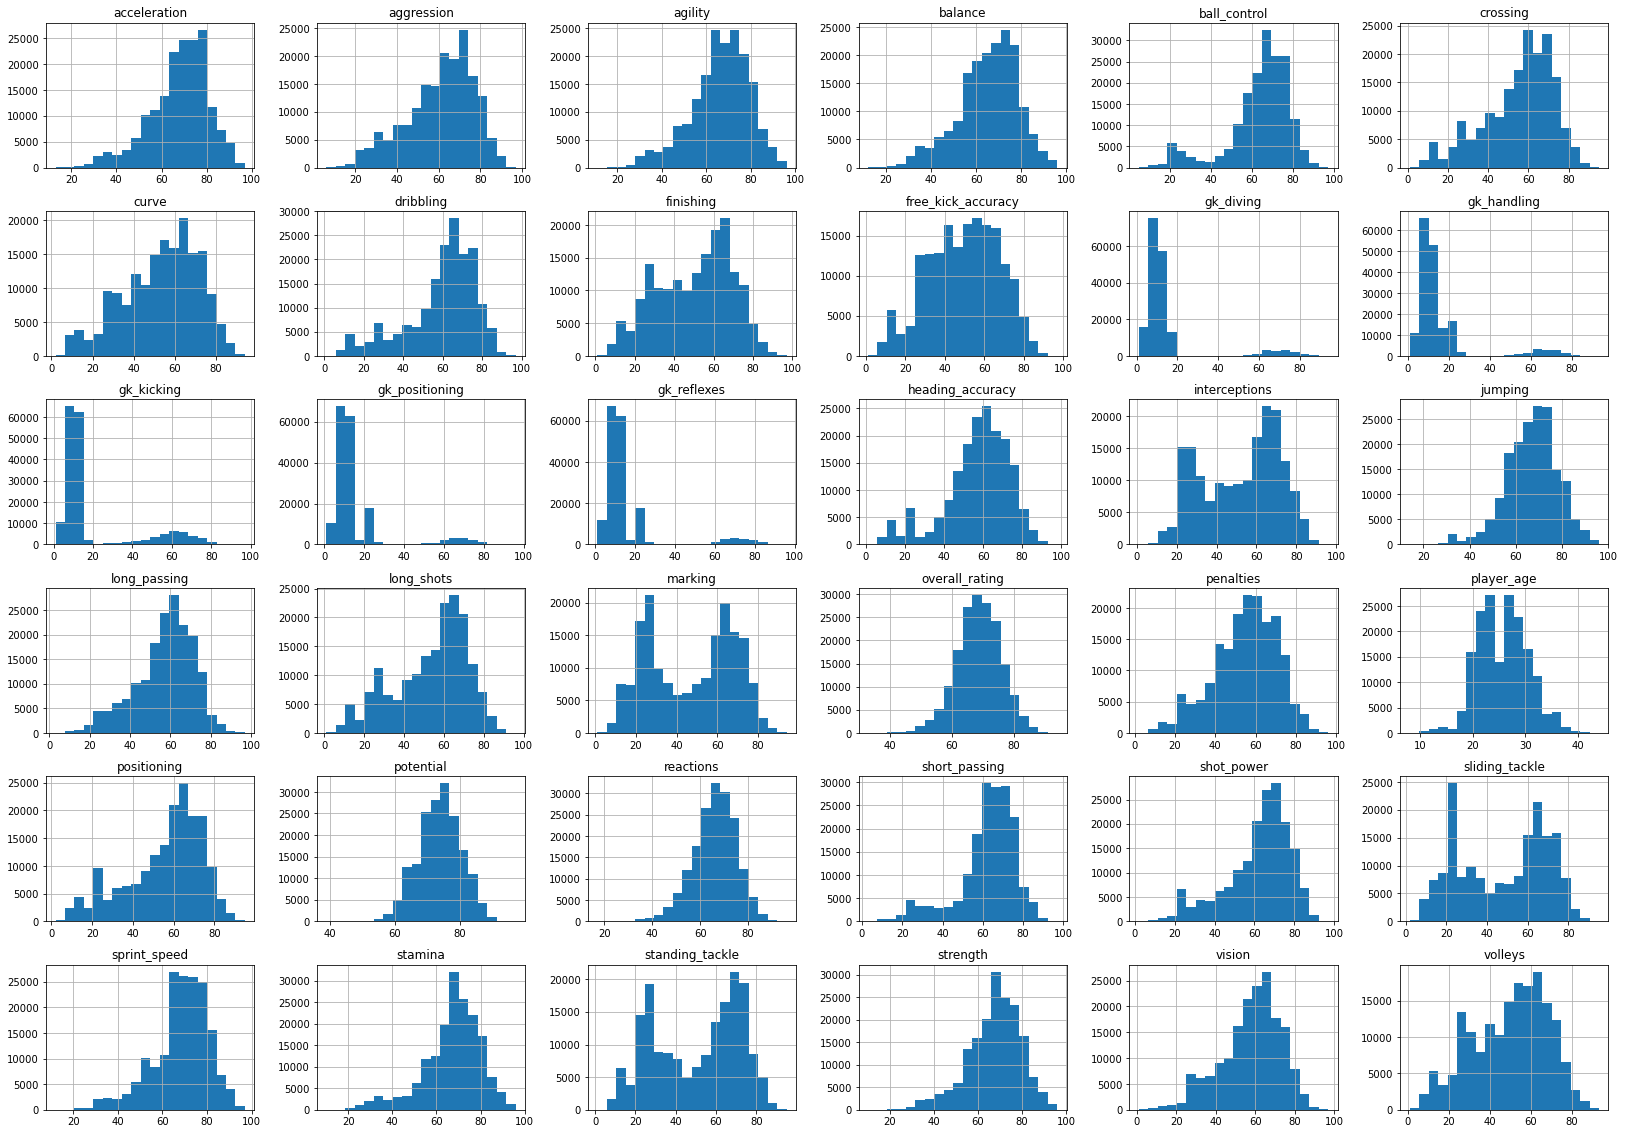

In [15]:
plot=stats_n.loc[:,['overall_rating', 'potential','crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'player_name',
       'player_age']].hist(bins=20, figsize=(28, 20))

In [16]:
stats_n.columns

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'player_name',
       'player_age'],
      dtype='object')

In [17]:
corr=stats_n.loc[:,['overall_rating', 'potential','crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'player_name',
       'player_age']].corr()

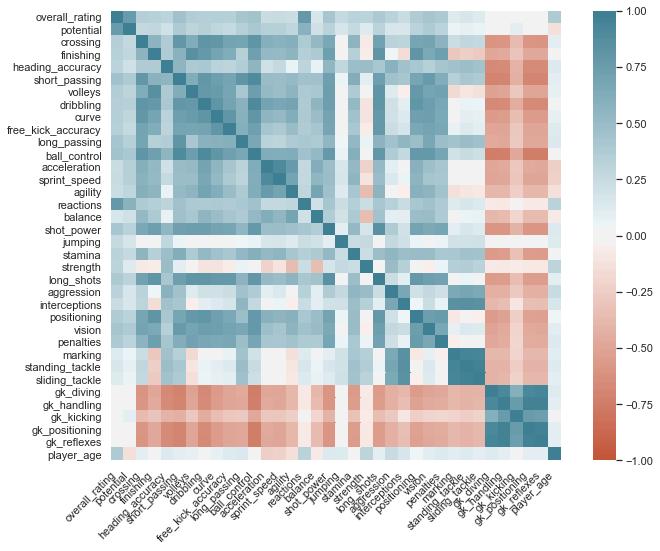

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
a=ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [19]:
target=corr.loc[:,['overall_rating']].reset_index()
target=target.rename(columns={'index':'features','overall_rating':'corr_with_overall_rating'})
target=target.loc[(target.features!='overall_rating') &
                  (abs(target.corr_with_overall_rating)>=0.3) & 
                  (abs(target.corr_with_overall_rating)<=0.7)]
target

,features,corr_with_overall_rating
2,crossing,0.357367
3,finishing,0.329919
4,heading_accuracy,0.314559
5,short_passing,0.458989
6,volleys,0.361970
7,dribbling,0.353778
8,curve,0.357719
9,free_kick_accuracy,0.350082
10,long_passing,0.434606
11,ball_control,0.444013


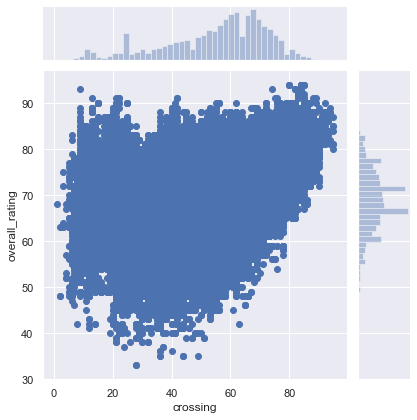

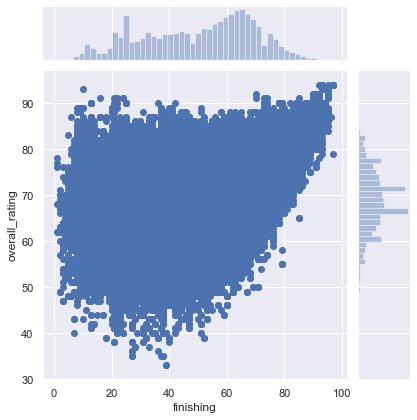

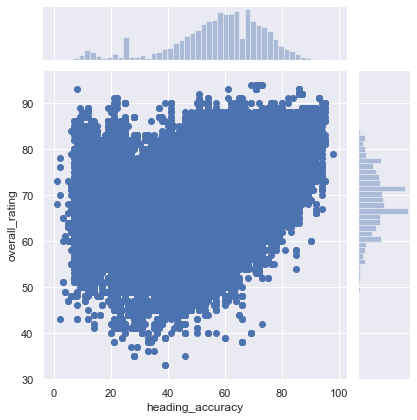

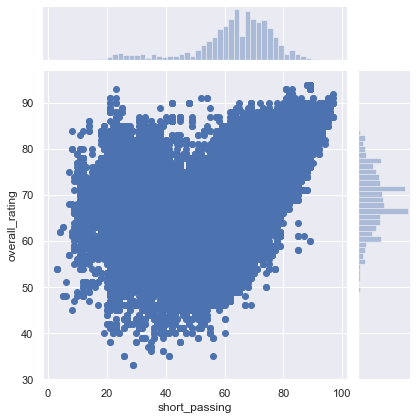

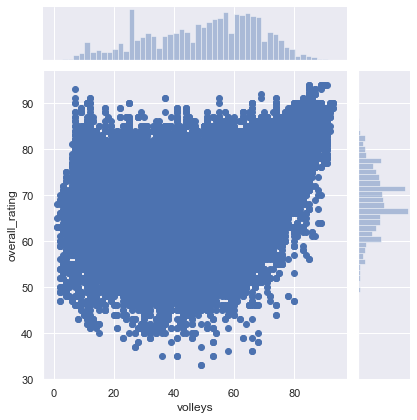

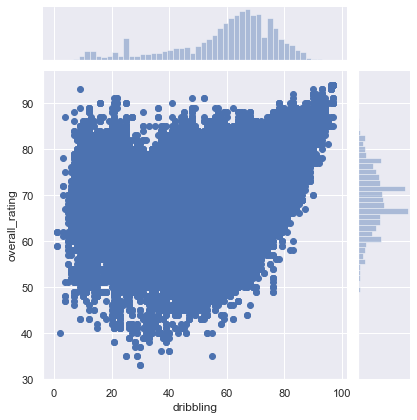

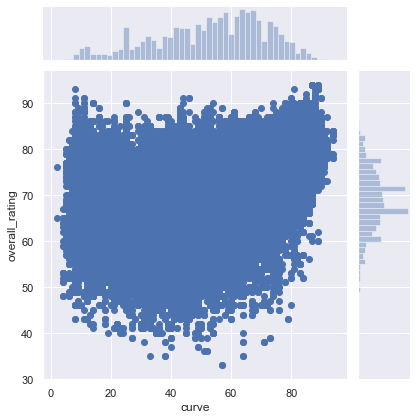

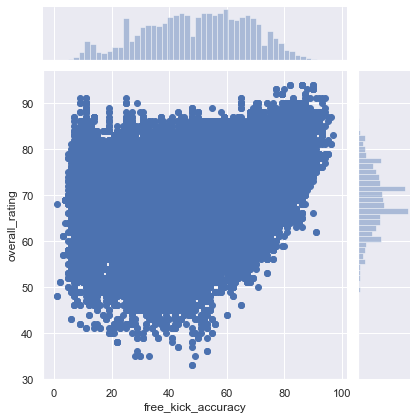

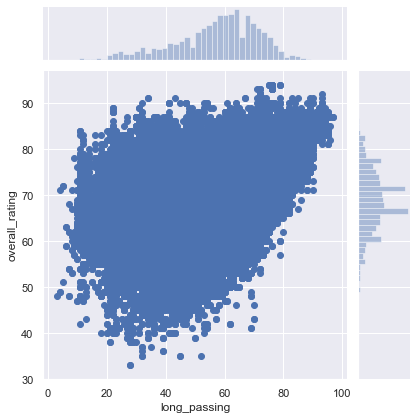

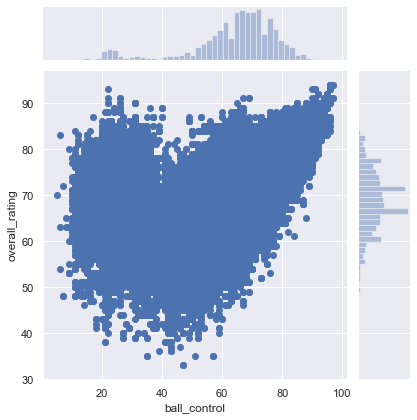

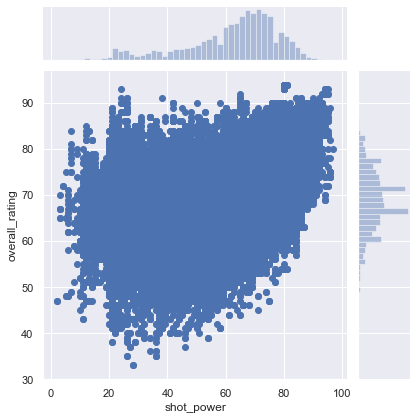

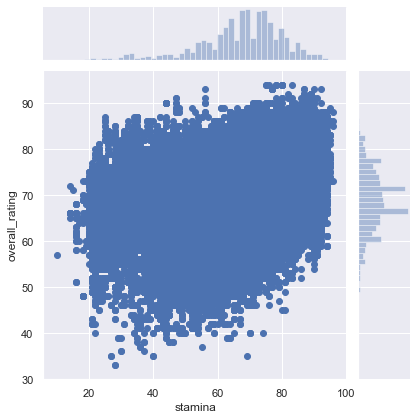

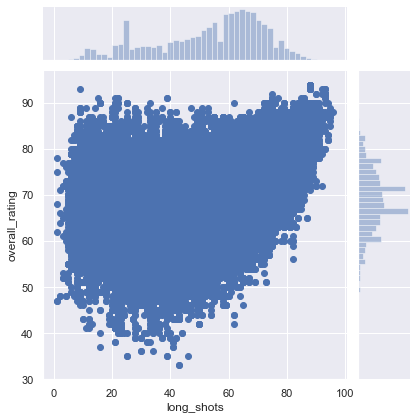

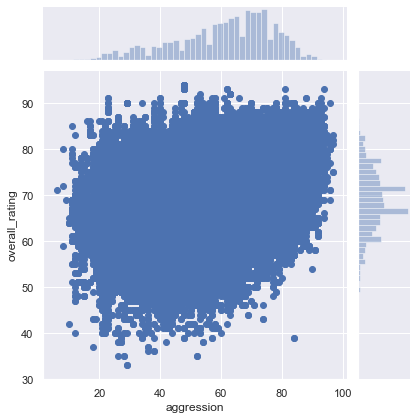

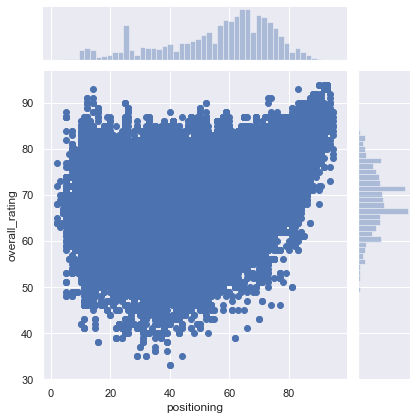

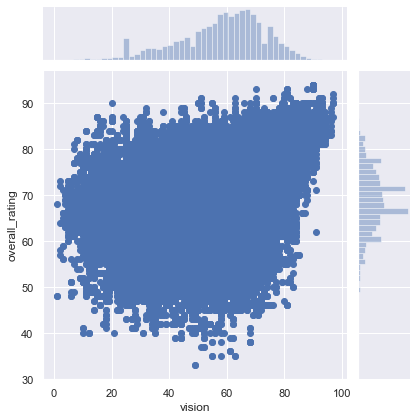

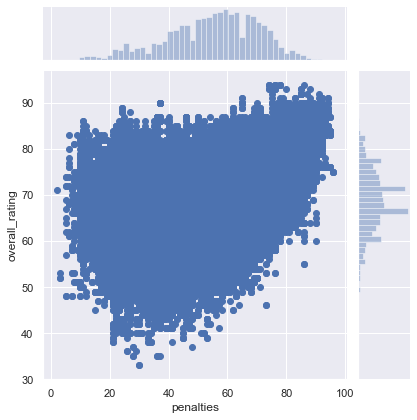

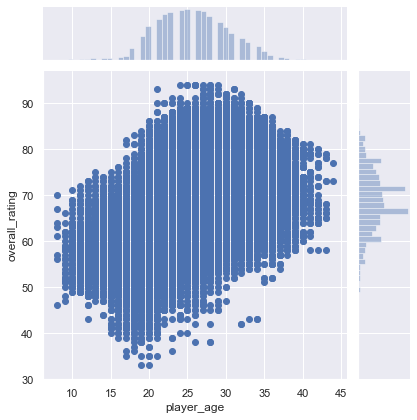

In [20]:
sns.jointplot(x=stats_n['crossing'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['finishing'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['heading_accuracy'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['short_passing'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['volleys'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['dribbling'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['curve'], y=stats_n['overall_rating'])

sns.jointplot(x=stats_n['free_kick_accuracy'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['long_passing'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['ball_control'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['shot_power'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['stamina'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['long_shots'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['aggression'], y=stats_n['overall_rating'])

sns.jointplot(x=stats_n['positioning'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['vision'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['penalties'], y=stats_n['overall_rating'])
sns.jointplot(x=stats_n['player_age'], y=stats_n['overall_rating'])

#### One Way Anova for categorical columns

In [21]:
import scipy.stats as stats

stats.f_oneway(stats_n['overall_rating'][stats_n['preferred_foot'] == 'right'],
               stats_n['overall_rating'][stats_n['preferred_foot'] == 'left']
               )

F_onewayResult(statistic=0.7327142543522761, pvalue=0.3920059695931385)

In [22]:
stats.f_oneway(stats_n['overall_rating'][stats_n['attacking_work_rate'] == 'high'],
               stats_n['overall_rating'][stats_n['attacking_work_rate'] == 'medium'],
               stats_n['overall_rating'][stats_n['attacking_work_rate'] == 'low']
               )

F_onewayResult(statistic=2202.5769273364267, pvalue=0.0)

In [23]:
stats.f_oneway(stats_n['overall_rating'][stats_n['defensive_work_rate'] == 'high'],
               stats_n['overall_rating'][stats_n['defensive_work_rate'] == 'medium'],
               stats_n['overall_rating'][stats_n['defensive_work_rate'] == 'low']
               )

F_onewayResult(statistic=2158.1248076542183, pvalue=0.0)

C:\Users\Ritaban Dutta\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Ritaban Dutta\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


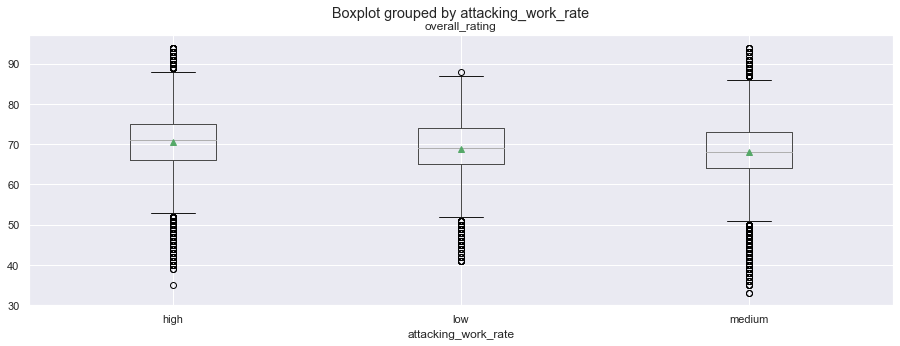

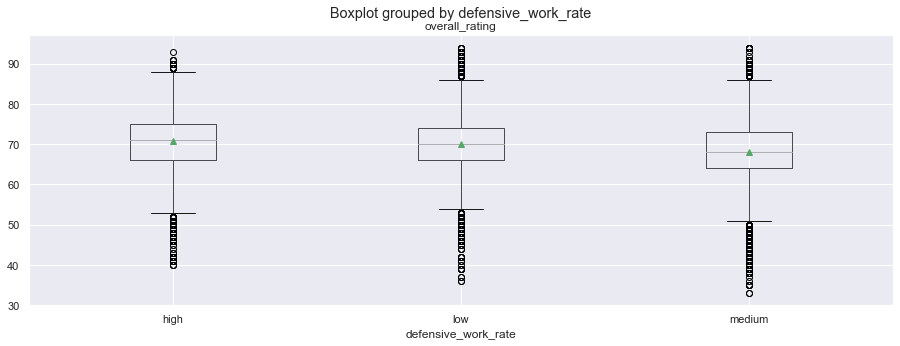

In [24]:
sns.set(rc={'figure.figsize':(15,5)})
stats_n.boxplot(column=['overall_rating'],by='attacking_work_rate',showmeans=True)
stats_n.boxplot(column=['overall_rating'],by='defensive_work_rate',showmeans=True)

In [26]:
y = pd.get_dummies(stats_n['attacking_work_rate'], prefix='attacking_work_rate')
y.head()

,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [27]:
z = pd.get_dummies(stats_n['defensive_work_rate'], prefix='defensive_work_rate')
z.head()

,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
w = stats_n.loc[:, target.features]
w.head()

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,shot_power,stamina,strength,long_shots,aggression,positioning,vision,penalties,player_age
0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,55.0,54.0,76.0,35.0,71.0,45.0,54.0,48.0,24.0
1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,55.0,54.0,76.0,35.0,71.0,45.0,54.0,48.0,24.0
2,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,55.0,54.0,76.0,35.0,63.0,45.0,54.0,48.0,24.0
3,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,54.0,54.0,76.0,34.0,62.0,44.0,53.0,47.0,23.0
4,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,54.0,54.0,76.0,34.0,62.0,44.0,53.0,47.0,15.0


In [29]:
x = stats_n.loc[:,['overall_rating']]

In [30]:
stats_n_new = pd.concat([x,y,z,w],axis=1)

In [31]:
stats_n_new.head()

,overall_rating,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,shot_power,stamina,strength,long_shots,aggression,positioning,vision,penalties,player_age
0,67.0,0,0,1,0,0,1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,55.0,54.0,76.0,35.0,71.0,45.0,54.0,48.0,24.0
1,67.0,0,0,1,0,0,1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,55.0,54.0,76.0,35.0,71.0,45.0,54.0,48.0,24.0
2,62.0,0,0,1,0,0,1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,55.0,54.0,76.0,35.0,63.0,45.0,54.0,48.0,24.0
3,61.0,0,0,1,0,0,1,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,54.0,54.0,76.0,34.0,62.0,44.0,53.0,47.0,23.0
4,61.0,0,0,1,0,0,1,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,54.0,54.0,76.0,34.0,62.0,44.0,53.0,47.0,15.0


#### Splitting into Test & Train

In [32]:
X = stats_n_new.drop(['overall_rating'],axis=1) # Features
y = stats_n_new.overall_rating # Target variable

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Running Random Forest

In [34]:
model = RandomForestRegressor()
model=model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
mape = np.mean(abs((y_test - y_pred)/y_test))
r2 = model.score(X_test, y_test)

print("     Test MAPE: {:.5f}".format(mape))
print("Test R^2 Score: {:.5f}".format(r2))

     Test MAPE: 0.01292
Test R^2 Score: 0.95427


In [36]:
print(dict(zip(X_train.columns,model.feature_importances_)))

{'attacking_work_rate_high': 0.00044992664885662605, 'attacking_work_rate_low': 0.0004574100926723146, 'attacking_work_rate_medium': 0.0004680819207151414, 'defensive_work_rate_high': 0.0006032245501512718, 'defensive_work_rate_low': 0.00022859560826966015, 'defensive_work_rate_medium': 0.000504530915444706, 'crossing': 0.02557473982852357, 'finishing': 0.022273963227169995, 'heading_accuracy': 0.1596074348168181, 'short_passing': 0.030317621191042234, 'volleys': 0.007576908771553887, 'dribbling': 0.015969343288040255, 'curve': 0.009013982490120205, 'free_kick_accuracy': 0.007452988148317339, 'long_passing': 0.020859432469082458, 'ball_control': 0.44337146362297863, 'shot_power': 0.015360342786041689, 'stamina': 0.02333898949642732, 'strength': 0.024639262869873488, 'long_shots': 0.007651191463426152, 'aggression': 0.046068688590933896, 'positioning': 0.03090523420244684, 'vision': 0.010754557602993946, 'penalties': 0.011084006816674808, 'player_age': 0.08546807858142548}


#### Running linear Regression

In [35]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train1=X_train
train=pd.concat([X_train1,y_train],axis=1)
#gather features
features1 = "+".join(X_train1.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('overall_rating ~' + features1, train, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(0)

C:\Users\Ritaban Dutta\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Ritaban Dutta\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.0,Intercept
1,inf,attacking_work_rate_high
2,inf,attacking_work_rate_low
3,inf,attacking_work_rate_medium
4,inf,defensive_work_rate_high
5,inf,defensive_work_rate_low
6,inf,defensive_work_rate_medium
7,5.0,crossing
8,6.0,finishing
9,3.0,heading_accuracy


In [37]:
vif=vif.loc[(vif['VIF Factor']<5) & (vif.features!='Intercept')]
vif

,VIF Factor,features
7,4.603515,crossing
9,2.707484,heading_accuracy
13,4.954168,curve
14,3.696649,free_kick_accuracy
15,3.827230,long_passing
17,4.640268,shot_power
18,2.267744,stamina
19,1.967419,strength
21,2.523576,aggression
22,4.781355,positioning


In [38]:
X_train=X_train.loc[:,vif.features]
X_test=X_test.loc[:,vif.features]

In [39]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
X2test = sm.add_constant(X_test)

est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     6221.
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:00:34   Log-Likelihood:            -3.8414e+05
No. Observations:              123312   AIC:                         7.683e+05
Df Residuals:                  123298   BIC:                         7.684e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 35.2069      0

In [40]:
pred = est2.predict(X2test)

rmse = np.sqrt(np.mean((y_test - pred)**2))
mape = np.mean(abs((y_test - pred)/y_test))


print("     Test MAPE: {:.5f}".format(mape))
print("Test R^2 Score: {:.5f}".format(r2))

     Test MAPE: 0.06374
Test R^2 Score: 0.95427
